In [1]:
!git clone -l -s --recursive git://github.com/burak-yildizoz/EAST.git EAST
!ls

Cloning into 'EAST'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 330 (delta 26), reused 39 (delta 15), pack-reused 274
Receiving objects: 100% (330/330), 2.03 MiB | 28.43 MiB/s, done.
Resolving deltas: 100% (155/155), done.
Submodule 'lanms/pybind11' (https://github.com/pybind/pybind11/) registered for path 'lanms/pybind11'
Cloning into '/content/EAST/lanms/pybind11'...
remote: Enumerating objects: 57, done.        
remote: Counting objects: 100% (57/57), done.        
remote: Compressing objects: 100% (40/40), done.        
remote: Total 14631 (delta 19), reused 25 (delta 12), pack-reused 14574        
Receiving objects: 100% (14631/14631), 6.00 MiB | 25.28 MiB/s, done.
Resolving deltas: 100% (9892/9892), done.
Submodule path 'lanms/pybind11': checked out '8de7772cc72daca8e947b79b83fea46214931604'
EAST  sample_data


In [2]:
%cd EAST
!./ubuntu.sh
# fix from tensorflow.contrib import slim
!pip3 install tensorflow==1.15

/content/EAST
tkinter already installed
unzip already installed
gdown already installed
Downloading...
From: https://drive.google.com/uc?id=0B3APw5BZJ67ETHNPaU9xUkVoV0U
To: /content/EAST/models/east_icdar2015_resnet_v1_50_rbox.zip
363MB [00:02, 170MB/s]
Archive:  east_icdar2015_resnet_v1_50_rbox.zip
  inflating: east_icdar2015_resnet_v1_50_rbox/checkpoint  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.data-00000-of-00001  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.index  
  inflating: east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491.meta  
Deleting east_icdar2015_resnet_v1_50_rbox.zip
--2021-03-17 16:02:05--  http://download.tensorflow.org/models/resnet_v1_50_2016_08_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.31.128, 2607:f8b0:400c:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.31.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95073259 (91M) [applic

In [3]:
!cp -r models/east_icdar2015_resnet_v1_50_rbox models/east_resnet_v1_50_rbox
!python3 multigpu_train.py --checkpoint_path models/east_resnet_v1_50_rbox --restore --batch_size_per_gpu 1 --num_readers 1 --max_steps 1 --save_checkpoint_steps 1 --save_summary_steps 1

Streaming output truncated to the last 5000 lines.
AssignSub: CPU 
Merge: CPU XLA_CPU 
Switch: CPU XLA_CPU 
Const: CPU XLA_CPU 
ApplyAdam: CPU 
IsVariableInitialized: CPU 
Assign: CPU 
RefSwitch: CPU 
VariableV2: CPU 
Identity: CPU XLA_CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/Initializer/zeros (Const) 
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta (VariableV2) /device:GPU:0
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/Assign (Assign) /device:GPU:0
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/read (Identity) /device:GPU:0
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/Adam/Initializer/zeros (Const) /device:GPU:0
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/Adam (VariableV2) /device:GPU:0
  resnet_v1_50/block3/unit_6/bottleneck_v1/conv1/BatchNorm/beta/Adam/Assign (Assign) /device:GPU:0


In [8]:
# modified test_images.py to comment out cv2.imshow
!python3 test_images.py --checkpoint_path models/east_resnet_v1_50_rbox/

path to images: ./training_samples
Wrote out ./outputs/img_2.jpg
Detecting text boxes for img_1.jpg
Loading model from models/east_resnet_v1_50_rbox/
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.





Instructions for updating:
Please use `layer.__call__` method instead.
resnet_v1_50/block1 (?, ?, ?, 256)
resnet_v1_50/block2 (?, ?, ?, 512)
resnet_v1_50/block3 (?, ?, ?, 1024)
resnet_v1_50/block4 (?, ?, ?, 2048)
Shape of f_0 (?, ?, ?, 2048)
Shape of f_1 (?, ?, ?, 512)
Shape of f_2 (?, ?, ?, 256)
Shape of f_3 (?, ?, ?, 64)

Shape of h_0 (?, ?, ?, 2048), g_0 (?, ?, ?, 2048)
Shape of h_1 (?, ?, ?, 128), g_1 (?, ?, ?, 128)
Shape of h_2 (?, ?, ?, 64), g_2 (?, ?, ?, 64)
Shape of h_3

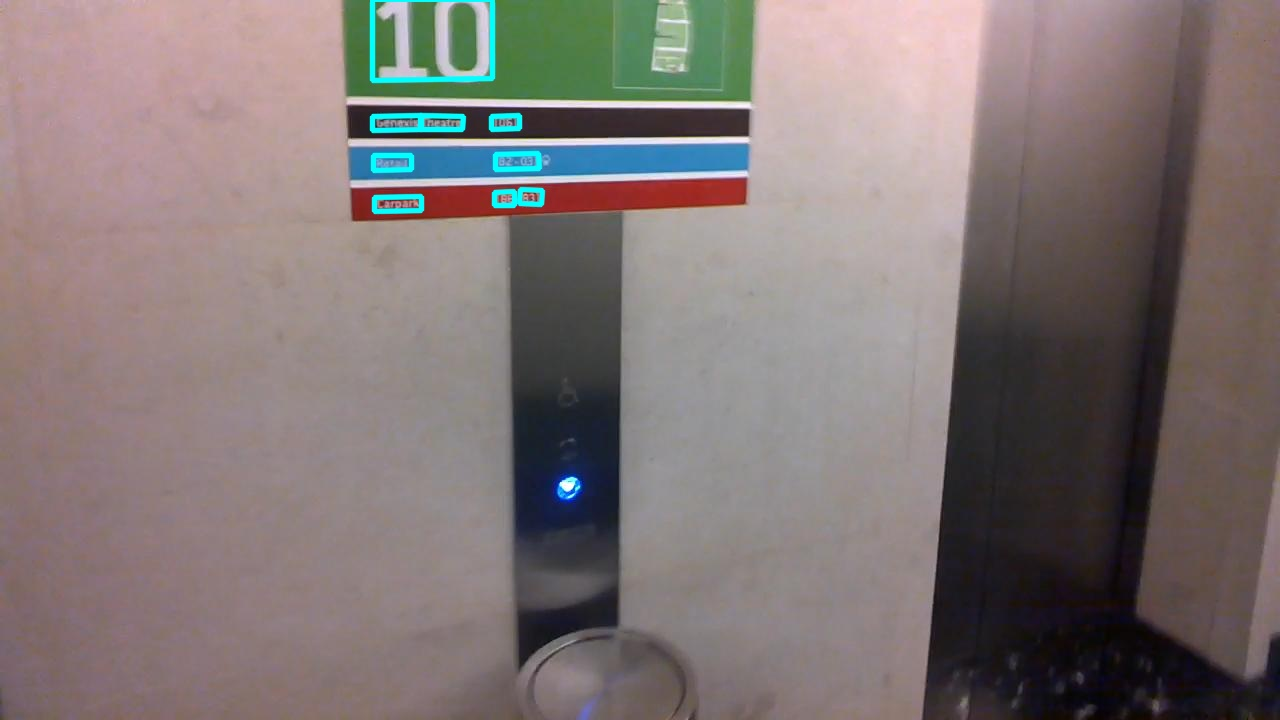

In [9]:
from IPython.display import Image
Image('./outputs/img_1.jpg')